# P1 - Test a Perceptual Phenomenon (the Stroop-Effect)

## Background Information

>In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions to consider

### 1. What is our independent variable? What is our dependent variable?

In this task, the **independent variable** is whether the words are displayed in the _congruent_ or the _incongruent words condition_.

The **dependent variable** is the _time_ it takes the participant to name the ink colors.

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

_Set of hypotheses:_

- **0 - the Null-Hypothesis:**
There is no difference in the average time that it takes the participants to name the color of the ink, regardless of whether it is being presented to them in the congruent or the incongruent words condition.

- **Ha - alternative Hypothesis:**
The average time the participants take for naming the ink color is longer in the incongruent words condition than in the congruent words condition.



### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [150]:
# importing the csv file into a pandas dataframe
import pandas as pd

filename = 'stroopdata.csv'

stroop_data = pd.read_csv(filename)
# taking a peek at the data
stroop_data.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


Taking a look at descriptive statistics for the dataset.

In [151]:
stroop_stats = stroop_data.describe()
stroop_stats

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [152]:
# adding 'range' as a second measure of variability
range_c = stroop_stats.Congruent['max'] - stroop_stats.Congruent['min']
range_ic = stroop_stats.Incongruent['max'] - stroop_stats.Incongruent['min']

range_df = pd.DataFrame({'Congruent' : pd.Series(range_c, index=['range']), 
                         'Incongruent' : pd.Series(range_ic, index=['range'])})

stroop_stats = stroop_stats.append(range_df)
stroop_stats

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000
range,13.698000,19.568000


#### Measures of Central Tendency

The **mean**, as a measure of central tendency, lies at 14 for the _congruent_ and at 22 for the _incongruent_ condition.

#### Measures of Variability

The **standard deviation** for the _congruent_ condition is 3.6, and for the incongruent condition it is 4.8. This means, that the data points in the incongruent condition group have a wider distribution.

This also comes to be visible when looking at the **range**s of the different columns: c = 13.7, ic = 19.6 - The range of the incongruent condition is wider, which means that the data is more spread out.

#### Statistical Test: Two-sample t-Test

I chose to use the two-sample t-Test for the data, because I want to compare the means between two datasets, to assess whether there is a statistically relevant difference.

Also, the dataset is relatively small (n=24), and I assume a normal distribution.

### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [153]:
def construct_hist(column_header):
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt

    # constructing the histogram
    plt.hist(stroop_data[column_header])
    plt.xlabel('time in seconds')
    plt.ylabel('participants')
    plt.axis([8, 36, 0, 7])
    plt.title("single-variable analysis for {0} words condition".format(column_header))
    plt.grid(True)

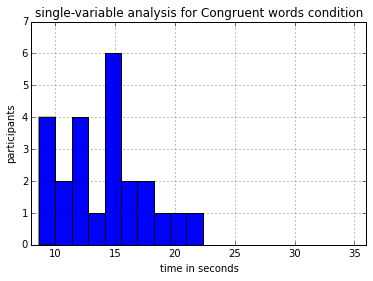

In [154]:
column_header = 'Congruent'
construct_hist(column_header)

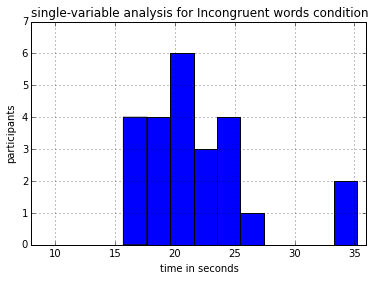

In [155]:
column_header = 'Incongruent'
construct_hist(column_header)

Looking at the histograms for the sample in each different condition on the same axis, shows that in the incongruent words condition the participants used to take generally longer than in the congruent words condition.

A normal distribution is not entirely evident, however, since this is such a small dataset, it would be difficult to prove one.

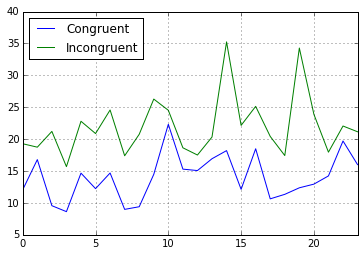

In [156]:
stroop_data.plot()

Calling a simple `df.plot()` on the Stroop data makes it clear that each participant (#0 - #24) took longer for naming the ink colors when the names did not match the colors.

Looking at this visualization makes it seem likely, that the alternative Hypothesis might be on the right path with its suggestion. However, we did not perform a statistical test yet, so the results are only suggestive.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [157]:
import math
## assembling the necessary values to perform the t-test
mean_congruent = stroop_stats.Congruent['mean']
mean_incongruent = stroop_stats.Incongruent['mean']
variance_congruent = stroop_stats.Congruent['std']**2
variance_incongruent = stroop_stats.Incongruent['std']**2
n_congruent = len(stroop_data.Congruent)
n_incongruent = len(stroop_data.Incongruent)
# Standard Error of the mean
SEM = math.sqrt((variance_congruent / n_congruent) + (variance_incongruent / n_incongruent))

## calculating the t-stats
t = (mean_congruent - mean_incongruent) / SEM
print "The result of the two-sample t-test are:", t

## preparing the values for looking up the table
if n_congruent == n_incongruent:
    n_sample = n_congruent
# degrees of freedom
d_f = n_sample - 1
print 'degrees of freedom: ', d_f

The result of the two-sample t-test are: -6.5322505539
degrees of freedom:  23


Looking up the table of critical values for our fitting **p-value**:

<img src="table_of_critical_values.png">

With a _d.f._ of 23 and a t = -6.5322505539, the p-value is way below the **critical t-value** for p = 0.01.
Therefore the differences between the two conditions can be considered _statistically relevant_.

With the t-value being so much lower than the critical value, this means that the probability, that there is no difference between the two tested conditions, is below 1%.

In [158]:
# using the scipy module for performing the t-test and p-value calculations
from scipy.stats import ttest_rel

cong_values = stroop_data['Congruent'].values
incong_values = stroop_data['Incongruent'].values

# I chose the 'two-tailed dependent t-test' according to the description in the module:
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel
t_test_results = ttest_rel(cong_values, incong_values)
print "results of the two-tailed dependent t-test:", t_test_results

# formatting the p-value to be more intuitive
p_value = format(t_test_results[1], '.10f')
print 'p-value for the two-tailed dependent t-test:', p_value

results of the two-tailed dependent t-test: (array(-8.020706944109959), 4.1030005857111556e-08)
p-value for the two-tailed dependent t-test: 0.0000000410


The **confidence interval** is at 95%. All the results for both of the conditions were taken from the same sample population.

---

### Conclusion

Considering the results of the statistical tests, I reject the Null-Hypothesis in favor of the alternative Hypothesis. The analysis of the data leads to the conclusion, that it took the participants of the Stroop-test significantly longer to identify the ink colors when the names displayed differed from the name of the ink color (incongruent names condition).

This is the result that I expected. However, my (very vague) assumption as to why this is the case seems to be incorrect. I thought that this lag is a result from different types of information being processed in different parts of the brain. Even though this might not be completely wrong, there are actually a few theories as to why the Stroop effect occurs:

- **Selective attention**: proposes that recognizing colors requires more attention than reading words.
- **Automaticity**: We're just way more used to reading than to naming colors, so our brain aims on doing that first.
- **Parallel distributed processing**: Which is a bit of a similar theory (and sounds tech-related ; ) - that the brain uses different paths to process different things. The one for reading is strongly developed, while naming colors is not as much. So the trained "muscle" is stronger than the less used one.
- **Processing speed**: All theories are a bit related, maybe: this one says that word processing is simply faster than recognizing colors.

So, all the different theories I read about that aim to explain the Stroop effect do have some things in common it feels, and I found this sentence on the associated Wikipedia page, that I find very interesting:

>There are several theories used to explain the Stroop effect and are commonly known as ‘race models’. This is based on the underlying notion that both relevant and irrelevant information are processed in parallel, but “race” to enter the single central processor during response selection.


### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Personally, I would add to the explanation very essentially the fact, that it's not just about _recognizing_ the colors, but also about _naming_ them.
Reading the article, I felt that this is not enough in focus. Because the imminence of formulating something when we are reading it is in my opinion much closer and higher than when looking at a color.

Through our days we often look at colors without ever having the thought of wording this to someone (or even ourselves). Reading, however, is very similar to speaking - therefore I think that the path between reading and formulating is a much more direct one than the one between seeing a color and speaking its name.

#### Experiments that might yield similar results

Since my theory to explain the Stroop effect has maybe a little different aspect than the ones mentioned above, I would try to look for similar situations where the **way of responding** is very much tied to the stimulus received.

: )

Okay, maybe it's a bit farfetched, but I'll try that one:

- Participants are put into a spot where they are comfortably able to catch a thing falling by them.
- In one part of the experiment, they are asked to catch those that would break when hitting the floor (e.g. an egg), and let those pass that would not (e.g. a small ball). The size of the objects should be similar, and the participants would know in advance which sorts of items they can expect to turn up, in order to remove some element of surprise).
- In the second part of the experiment, they are asked to formulate whether the object will break or not, while they see it falling by
- In both cases the response times are recorded and compared.

I would find such an experimental set-up interesting, because I can imagine that there is a stronger stimulus-response connection between _a falling object_ and a _physical reaction_ (e.g. trying to catch it), than there is between _a falling object_ and a spoken response.

With this set-up I'd aim on assessing whether there might be a similar "lag" as there is in the Stroop effect, and then I'd try to research further whether it might be related to the specific _type_ of response to a specific _type_ of stimulus.

## Resources

**Stroop-effect**:

- https://faculty.washington.edu/chudler/words.html#seffect
- https://en.wikipedia.org/wiki/Stroop_effect
- https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True

**statistics**:

- https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php
- http://stattrek.com/statistics/dictionary.aspx?definition=confidence_level
- http://stattrek.com/statistics/dictionary.aspx?definition=Confidence_interval

**t-tests**: 

- http://www.andrewgray.com/teachers/ttests.htm
- http://www2.le.ac.uk/offices/ld/resources/numerical-data/variability
- https://explorable.com/students-t-test
- http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel
- http://stackoverflow.com/questions/13404468/t-test-in-pandas-python
- http://mathforum.org/library/drmath/view/65472.html
- https://explorable.com/students-t-test

**python**:

- http://stackoverflow.com/questions/25099626/python-convert-scientific-notation-to-float

**visualization**:

- http://pandas.pydata.org/pandas-docs/stable/visualization.html
- http://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html
- http://matplotlib.org/users/pyplot_tutorial.html
